# Problem statement

Prepare a classification model using SVM for salary data

In [78]:
from pandas import read_csv
import numpy as np
import seaborn as sn
import pandas as pd
from sklearn import preprocessing 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [40]:
salary_train = pd.read_csv("SalaryData_Train.csv")

In [41]:
salary_test = pd.read_csv("SalaryData_Test.csv")

In [42]:
salary_train.shape

(30161, 14)

In [43]:
salary_test.shape

(15060, 14)

In [44]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [45]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [46]:
salary_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [47]:
salary_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

We can see there are no null values in our data and there are few numerical values and few categorical values. 

In [48]:
salary_train.duplicated().sum()

3258

In [49]:
salary_test.duplicated().sum()

930

In [50]:
salary_train = salary_train.drop_duplicates()

In [51]:
salary_test = salary_test.drop_duplicates()

In [52]:
salary_train.shape

(26903, 14)

In [53]:
salary_test.shape

(14130, 14)

In [54]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We need to convert categorical columns into numerical values by using encoding techniques.

In [55]:
colConvert = ["workclass","maritalstatus","occupation","relationship","race","sex","native",]

In [57]:
for col in colConvert:
    salary_train = pd.get_dummies(salary_train, columns=[col])
    salary_test = pd.get_dummies(salary_test, columns=[col])

In [58]:
salary_train.head()

,age,education,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,Bachelors,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,Bachelors,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,HS-grad,9,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,11th,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,Bachelors,13,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
salary_train['education'].value_counts()

 HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64

In [60]:
label_encoder = preprocessing.LabelEncoder() 
 
salary_train['education']= label_encoder.fit_transform(salary_train['education']) 
  
salary_train['education'].unique()

array([ 9, 11,  1, 12,  6, 15,  7,  5, 10,  8, 14,  4,  0, 13,  2,  3])

In [61]:
salary_test['education']= label_encoder.fit_transform(salary_test['education']) 
  
salary_test['education'].unique()

array([ 1, 11,  7, 15,  0, 14,  5,  9, 12,  4,  8,  6, 10,  2,  3, 13])

In [63]:
salary_train

,age,education,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,9,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,9,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,11,9,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,1,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,9,13,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,12,14,0,0,40,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30155,22,15,10,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30156,27,7,12,0,0,38,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30158,58,11,9,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [64]:
salary_train['Salary'].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

We could see that the count of Salary<=50K is very high when compared to Salary>=50K. The sets of data in which classes are not evenly distributed are called imbalanced datasets.The imbalance dataset can cause high/low accuracy

In [65]:
salary_test['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

# Understanding the target variable

<b>Our main objective is to identify the salary class for the given features. So our target variable is salary.</b>

<AxesSubplot:xlabel='Salary', ylabel='count'>

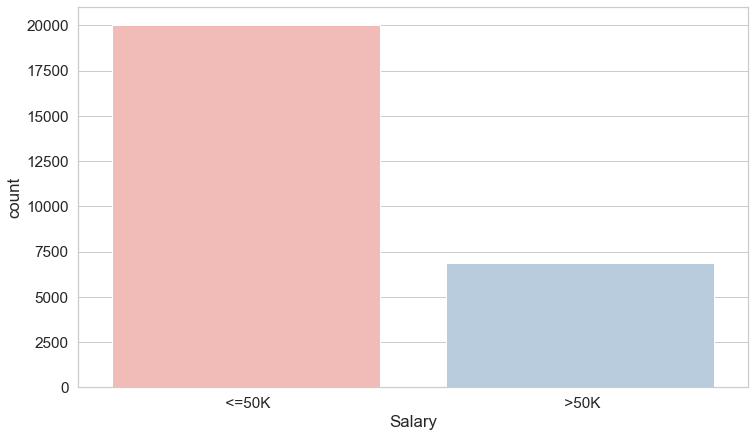

In [68]:
sn.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sn.countplot(x = 'Salary', data = salary_train, palette = 'Pastel1')

<AxesSubplot:xlabel='Salary', ylabel='count'>

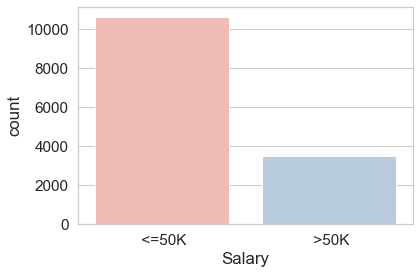

In [69]:
sn.countplot(x = 'Salary', data = salary_test, palette = 'Pastel1')

In [70]:
salary_train

,age,education,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,9,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,9,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,11,9,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,1,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,9,13,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,12,14,0,0,40,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30155,22,15,10,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30156,27,7,12,0,0,38,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30158,58,11,9,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [71]:
salary_test

,age,education,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,1,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,11,9,0,0,50,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,7,12,0,0,40,>50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,15,10,7688,0,40,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,34,0,6,0,0,30,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,9,13,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15056,39,9,13,0,0,36,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15057,38,9,13,0,0,50,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15058,44,9,13,5455,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Splitting the columns into feature and Label data

In [72]:
X_train = salary_train.drop('Salary',axis=1)

In [73]:
Y_train = salary_train['Salary']

In [74]:
X_test = salary_test.drop('Salary',axis=1)

In [75]:
Y_test = salary_test['Salary']

# Using SVM to build the classification model

In [77]:
svm = SVC()
svm.fit(X_train, Y_train)
y_pred_svm = svm.predict(X_test)

y_pred_svm

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [79]:
print(accuracy_score(Y_test, y_pred_svm))

0.7960368011323425


In [80]:
y_pred_train_svm = svm.predict(X_train)

In [81]:
print(accuracy_score(Y_train, y_pred_train_svm))

0.7940378396461362


<b>There is not much difference between the accuracy score for train data and test data. So we can finalize the model.</b>